## Проект "Анализ Бизнес-показателей"

### Описание проекта 
    
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.
    
### Цели исследования:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов..</div>

### Чтение данных и подготовка их к анализу

#### Импортируем необходимые библиотеки: 

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#### Выполним предобработку данных в датафрейме 'visits'

In [101]:
visits=pd.read_csv('/datasets/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [ ]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    purchases = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

except:
    visits = pd.read_csv('/my_folder_with_files/visits_info_short.csv')
    purchases = pd.read_csv('/my_folder_with_files/orders_info_short.csv')
    costs = pd.read_csv('/my_folder_with_files/costs_info_short.csv')

In [102]:
#переименуем названия столбцов, приведем к змеиному регистру
visits=visits.rename(columns={'User Id':'user_id', 'Region': 'region', 'Device':'device',\
                              'Channel':'channel', 'Session Start': 'session_start','Session End': 'session_end'})

In [103]:
print(visits.info()) #выведем на экран тип данных
print()
print('Пропуски в датафрейме:')
print(visits.isna().sum()) #убедимся в отсутствии пропусков
print()
print('Явные дубликаты в датафрейме:', visits.duplicated().sum()) #убедимся в отсутствии явных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Пропуски в датафрейме:
user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Явные дубликаты в датафрейме: 0


#### Выполним предобработку данных в датафрейме 'orders'

In [104]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [105]:
#переименуем названия столбцов, приведем к змеиному регистру
orders=orders.rename(columns={'User Id':'user_id', 'Event Dt': 'event_dt','Revenue': 'revenue'})

In [106]:
print(orders.info()) #выведем на экран тип данных
print()
print('Пропуски в датафрейме:')
print(orders.isna().sum()) #убедимся в отсутствии пропусков
print()
print('Явные дубликаты в датафрейме:', orders.duplicated().sum()) #убедимся в отсутствии явных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Пропуски в датафрейме:
user_id     0
event_dt    0
revenue     0
dtype: int64

Явные дубликаты в датафрейме: 0


#### Выполним предобработку данных в датафрейме 'costs'

In [107]:
costs=pd.read_csv('/datasets/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [108]:
#переименуем названия столбцов, приведем к змеиному регистру
costs=costs.rename(columns={'Channel':'channel'})

In [109]:
print(costs.info()) #выведем на экран тип данных
print()
print('Пропуски в датафрейме:')
print(costs.isna().sum()) #убедимся в отсутствии пропусков
print()
print('Явные дубликаты в датафрейме:', orders.duplicated().sum()) #убедимся в отсутствии явных дубликатов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Пропуски в датафрейме:
dt         0
channel    0
costs      0
dtype: int64

Явные дубликаты в датафрейме: 0


#### Преобразование данных о времени

In [110]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [111]:
print(visits.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция get_profiles() — для создания профилей пользователей

In [112]:
def get_profiles(visits, orders, costs):

    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs =costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
        
    
    return profiles

In [113]:
profiles = get_profiles(visits, orders, costs) #вызовем функцию get_profiles и выведем датасет profiles на экран
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [114]:
#profiles.info()

#### Функция get_retention() — для подсчёта Retention Rate

In [115]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция get_conversion()

In [116]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time   

In [117]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)
#conversion

#### Функция get_ltv()

In [118]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )     

In [119]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders,datetime(2019, 11, 1).date(), 14
)
#ltv_history

#### Функции для построения графиков: filter_data() — для сглаживания данных

In [120]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [121]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#plot_retention(retention, retention_history, 14) 

In [122]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [123]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# считаем LTV, CAC и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    datetime(2019, 11, 1).date(),
    14,
    dimensions=['channel'],
)

# строим графики
#plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14) 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [124]:
# вызываем функцию get_profiles и выводим на экран датасет с профилями пользователей:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определите минимальную и максимальную даты привлечения пользователей 

In [125]:
# данные получим из столца profiles['dt']
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Вывод: интервал привлечения пользователей в приложение с 1 мая по 27 октября 2019 года**

#### Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [126]:
# рассчитаем долю платящих пользователей датасета по всем странам:
profiles_paying = profiles.query('payer==True')
print('Уникальных пользователей в датасете:', profiles['user_id'].nunique())
print('Платящих пользователей в датасете:', profiles_paying['user_id'].nunique())
print('Доля платящих пользователей в датасете:', profiles_paying['user_id'].nunique()/profiles['user_id'].nunique(),\
      'или', round(profiles_paying['user_id'].nunique()/profiles['user_id'].nunique()*100), '%')

Уникальных пользователей в датасете: 150008
Платящих пользователей в датасете: 8881
Доля платящих пользователей в датасете: 0.05920350914617887 или 6 %


In [127]:
# составим сводную таблицу для расчета количества пользователей и доли платящих пользователей с разбивкой по странам:
profiles.groupby('region').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.sort_values(by='payers_part', ascending=False)

,users,payers,payers_part
region,,,
United States,100002,6902,0.069019
Germany,14981,616,0.041119
UK,17575,700,0.039829
France,17450,663,0.037994


Text(0.5, 1.0, 'Общее количество пользователей и платящие пользователи с разбивкой по странам')

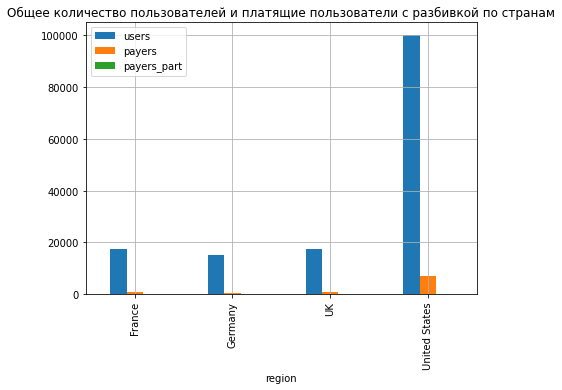

In [128]:
#выведем на экран столбчатую диаграмму для наглядности:
profiles.groupby('region').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.plot(kind='bar', grid=True, figsize = (7,5))
plt.title('Общее количество пользователей и платящие пользователи с разбивкой по странам')

**Вывод: пользователи в приложение приходят из США, Соедененного Королевства, Германии и Франции. Больше всего пользователей приложения из США, суммарно количество пользователей Европы (Соедененного Королевства, Германии и Франции) составляют примерно половину от пользователей США.** 

**Что касается платящих пользователей, то в среднем по датасету их 6%. Если делать разбивку по странам, то платящих пользователей также больше из США: 7% против примерно 4% из Европейских стран (Соедененного Королевства, Германии и Франции).**

#### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [129]:
# составим сводную таблицу для расчета количества пользователей и доли платящих пользователей с разбивкой по устройствам:
profiles.groupby('device').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.sort_values(by='payers_part', ascending=False)

,users,payers,payers_part
device,,,
Mac,30042,1912,0.063644
iPhone,54479,3382,0.062079
Android,35032,2050,0.058518
PC,30455,1537,0.050468


Text(0.5, 1.0, 'Общее количество пользователей и платящие пользователи с разбивкой по устройствам')

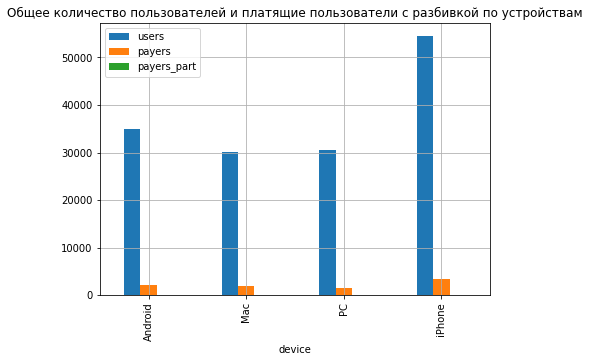

In [130]:
#выведем на экран столбчатую диаграмму для наглядности:
profiles.groupby('device').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.plot(kind='bar', grid=True, figsize = (7,5))
plt.title('Общее количество пользователей и платящие пользователи с разбивкой по устройствам')

**Вывод: Самый большой процент клиентов заходят в приложение через айфон, далее примерно в равных долях идут ПК, андроид и Мак. Платящие пользователи чаще всего также используют Мак и Айфон (доля примерно 6%), далее следуют андроид (доля 5.8%) и ПК (5%). Здесь стоит отметить, что доли платящих пользователей по устройствам различаются не сильно: всего на 1%.**

#### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [131]:
# составим сводную таблицу для расчета количества пользователей и доли платящих пользователей с разбивкой по каналам:
profiles.groupby('channel').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.sort_values(by='payers_part', ascending=False)

,users,payers,payers_part
channel,,,
FaceBoom,29144,3557,0.122049
AdNonSense,3880,440,0.113402
lambdaMediaAds,2149,225,0.104700
TipTop,19561,1878,0.096007
RocketSuperAds,4448,352,0.079137
WahooNetBanner,8553,453,0.052964
YRabbit,4312,165,0.038265
MediaTornado,4364,156,0.035747
LeapBob,8553,262,0.030633


Text(0.5, 1.0, 'Общее количество пользователей и платящие пользователи с разбивкой по устройствам')

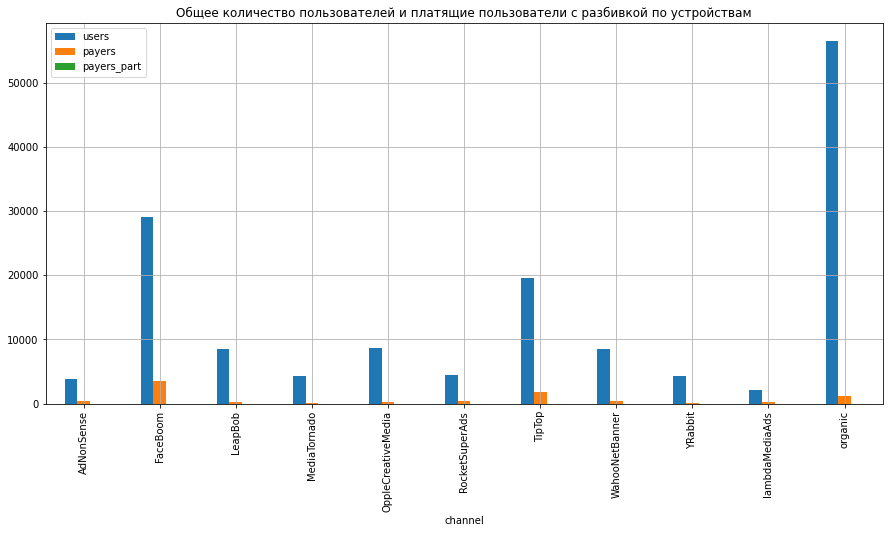

In [132]:
#выведем на экран столбчатую диаграмму для наглядности:
profiles.groupby('channel').agg(users = ('user_id', 'nunique'), payers = ('payer', 'sum'), payers_part = ('payer', 'mean'))\
.plot(kind='bar', grid=True, figsize = (15,7))
plt.title('Общее количество пользователей и платящие пользователи с разбивкой по устройствам')

**Вывод: Тройка лидеров каналов привлечения всех пользователей: 1- Organic, 2 - FaceBoom, 3-TipTop. Тройка лидеров платящих пользователей 1-FaceBoom (доля платящих - 12%), 2-TipTop (доля платящих - 10%), 3-Organic (доля платящих - 2%).**

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитайте общую сумму расходов на маркетинг.

In [133]:
total_costs=round(costs['costs'].sum())
total_costs

105497

**Общая сумма расходов на рекламные кампании: 105 497 денежных единиц (в аннотации к датасету не указана валюта)**

#### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [134]:
costs_agg = costs.groupby('channel').agg(costs = ('costs', 'sum')).sort_values(by='costs', ascending=False)
costs_agg['costs_part'] = costs_agg['costs']/total_costs 
costs_agg

,costs,costs_part
channel,,
TipTop,54751.30,0.518984
FaceBoom,32445.60,0.307550
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037075
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


Text(0.5, 1.0, 'Распределение трат по рекламным источникам')

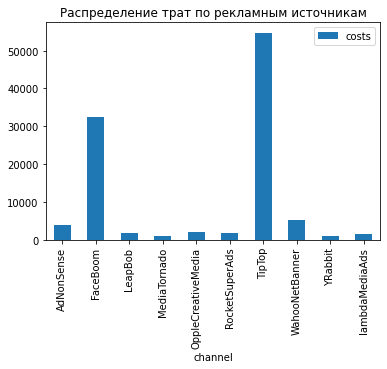

In [135]:
#выведем на экран столбчатую диаграмму распределения трат по рекламным источникам:
costs_agg = costs.groupby('channel').agg(costs = ('costs', 'sum')).plot(kind='bar')
plt.title('Распределение трат по рекламным источникам')

**Вывод: больше всего денежных средств было вложено в рекламу в TipTop (54751.30 ден.ед. или 52% от общих трат) и FaceBoom (32 445.60 ден.ед. - 31% от общих трат)** 

По сумме трат в каналах лидирует TipTop: ему принадлежат 52% всего бюджета. Доля платящих пользователей TipTop - 10% - на 4 месте в рейтинге всех каналов. Что касается FaceBoom, то по тратам канал на 2 месте после TipTop: ему принадлежат 31% от всего бюджета, доля платящих пользователей 12%, что относит канал на 1 место в рейтинге. </div>

#### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [136]:
#добавим в датафрейм столбцы с номером месяца и неделями
costs['month'] = pd.DatetimeIndex(costs['dt']).month 
costs['week'] = costs['dt'].astype('datetime64[W]')
costs

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,2019-04-25
1,2019-05-02,FaceBoom,78.1,5,2019-05-02
2,2019-05-03,FaceBoom,85.8,5,2019-05-02
3,2019-05-04,FaceBoom,136.4,5,2019-05-02
4,2019-05-05,FaceBoom,122.1,5,2019-05-02
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,2019-10-17
1796,2019-10-24,lambdaMediaAds,6.4,10,2019-10-24
1797,2019-10-25,lambdaMediaAds,8.8,10,2019-10-24
1798,2019-10-26,lambdaMediaAds,8.8,10,2019-10-24


In [137]:
# строим график истории расходов по каждому каналу привлечения по всему периоду
#costs.pivot_table(index='dt', columns='channel', values='costs', aggfunc='sum').plot(grid=True, figsize=(15, 7))

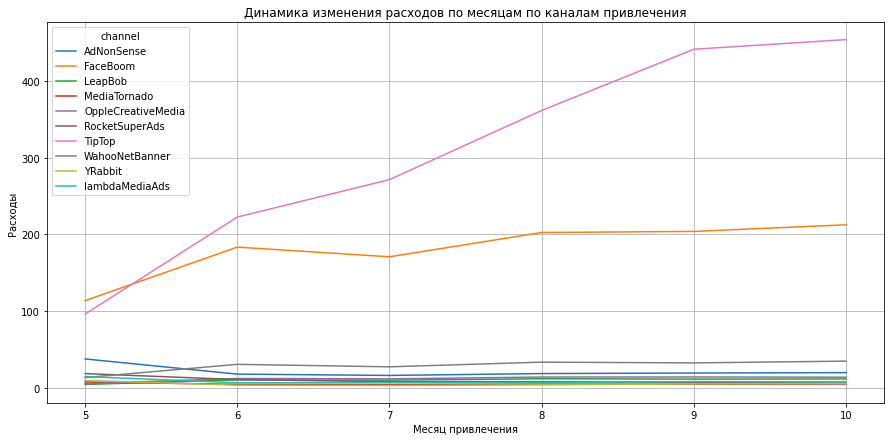

In [138]:
#Построим график динамики изменений расходов по месяцам по каналам привлечения 
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'mean')\
.plot(grid=True, figsize = (15,7)) 
plt.ylabel('Расходы')
plt.xlabel('Месяц привлечения')
plt.title('Динамика изменения расходов по месяцам по каналам привлечения')
plt.show()

**Вывод: расходы растут с мая по октябрь по каналам TipTop (со 100  до 450 денежных ед.) и FaceBoom (со 100 до 200 денежных ед). Что касается других каналов, по ним расходы в динамике не изменяются.** 

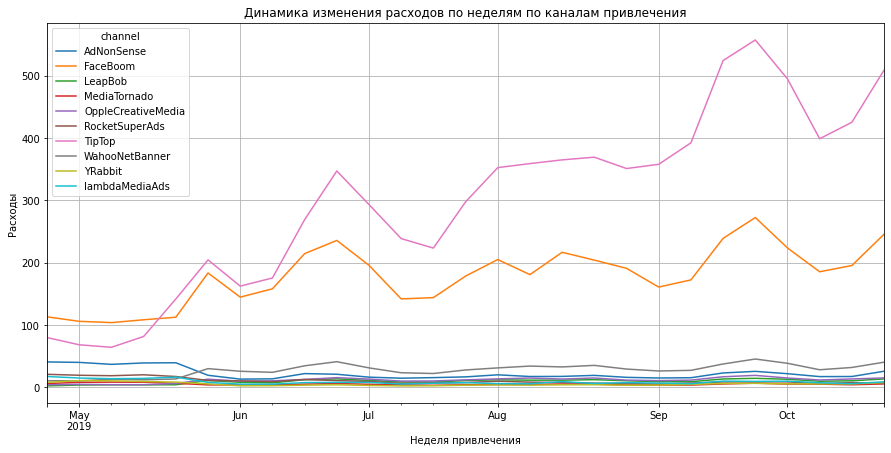

In [139]:
costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'mean')\
.plot(grid=True, figsize = (15,7)) 
plt.ylabel('Расходы')
plt.xlabel('Неделя привлечения')
plt.title('Динамика изменения расходов по неделям по каналам привлечения')
plt.show()

**Вывод: на графике с выделением недель можно отметить явную закономерность увеличения рекламного бюджета наших самых дорогих каналов TipTop и FaceBoom на 3 неделе каждого месяца с характерным падением к 1 неделе следующего месяца.** 

In [140]:
# строим график истории изменений CAC по каналам привлечения

#profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(15, 7))plt.ylabel('CAC')plt.xlabel('Дата привлечения')plt.title('Динамика САС по каналам привлечения')plt.show()

#### Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [141]:
#profiles.head()

,cac_mean
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


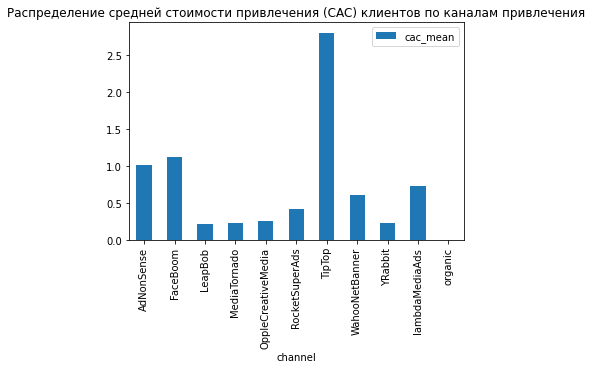

In [142]:
#составим сводную таблицу :
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost':'cac_mean'}).plot(kind='bar')
plt.title('Распределение средней стоимости привлечения (CAC) клиентов по каналам привлечения')

#выведем на экран столбчатую диаграмму для наглядности:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost':'cac_mean'}).\
sort_values(by='cac_mean', ascending=False)

In [144]:
#отфильтруем канал organic
profiles_ads=profiles.query('channel!="organic"')

In [145]:
#рассчитаем среднюю стоимость привлечения пользователей в платных каналах по всему датасету:
profiles_ads['acquisition_cost'].mean()

1.1274813239427588

**Вывод: средняя стоимость привлечения пользователей в платных каналах 1.13.**

**Вывод: самая высокая стоимость привлечения 1 клиента (CAC) в канале TipTop = 2.8 (в 2.5 раза превышает средний СаС по платным каналам), в FaceBoom = 1.1 (на уровне среднего СаС по платным каналам). Далее по убыванию от 1.0 до 0 следуют другие рекламные каналы.**

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi()

**Отфильтруем органических пользователей**

In [146]:
# оставим в датасете только пользователей, которые пришли через рекламные каналы:
profiles_ads=profiles.query('channel!="organic"')

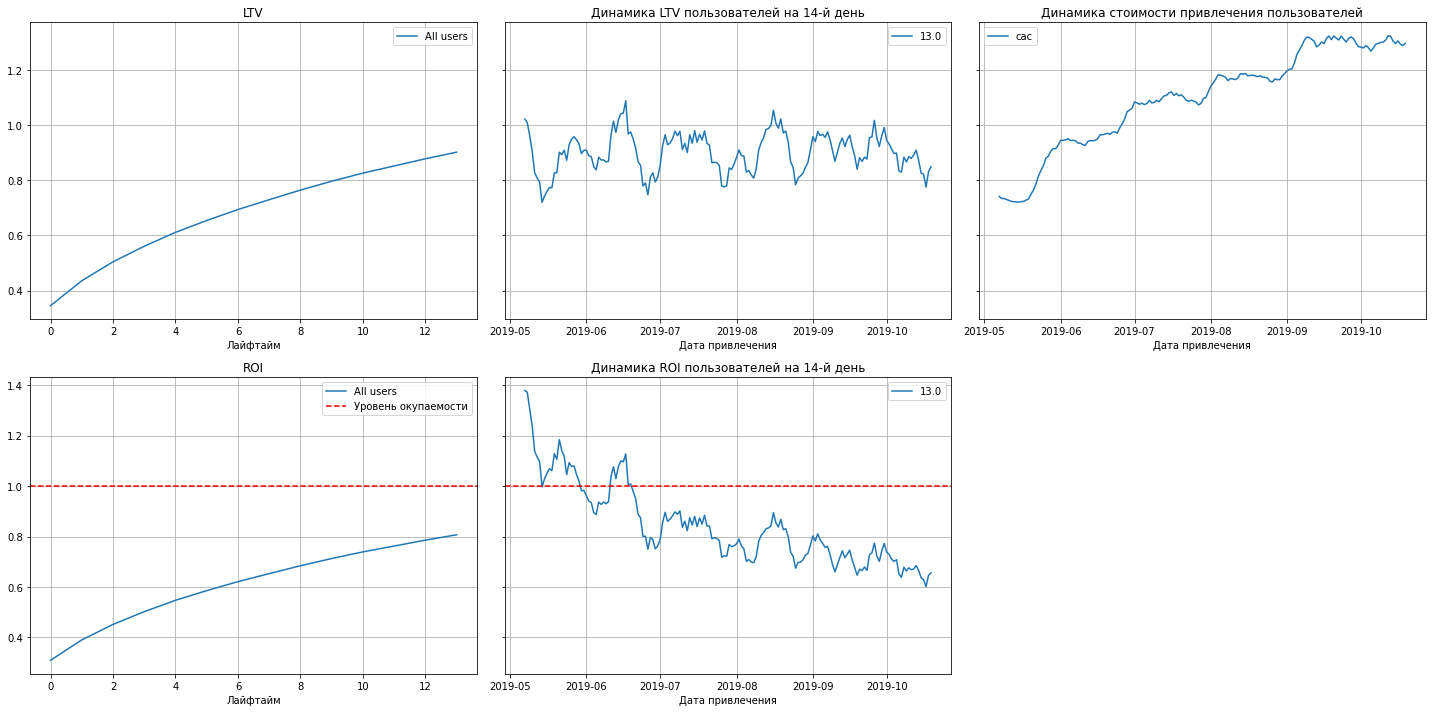

In [147]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14) 

**По графикам можно сделать такие выводы:**
Реклама не окупается. ROI к 14ому дню выходит на уровень 80%.
CAC заметно растет с мая по октябрь, что говорит об увеличении рекламного бюджета.
LTV в динамике на 14 день стабильно колеблется от 0.8 до 1, что соотвествует усредненному LTV 0.9 на графике слева. 
ROI в динамике на 14 день держится на уровне окупаемости с мая по середин июня, а с июля по октябрь монотонно снижается, падая за уровень окупаемости.  То есть с мая по середину июня реклама окупалась, а далее начались проблемы.

Для более детального анализа пройдём по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения (п.5.3 - 5.5).

#### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

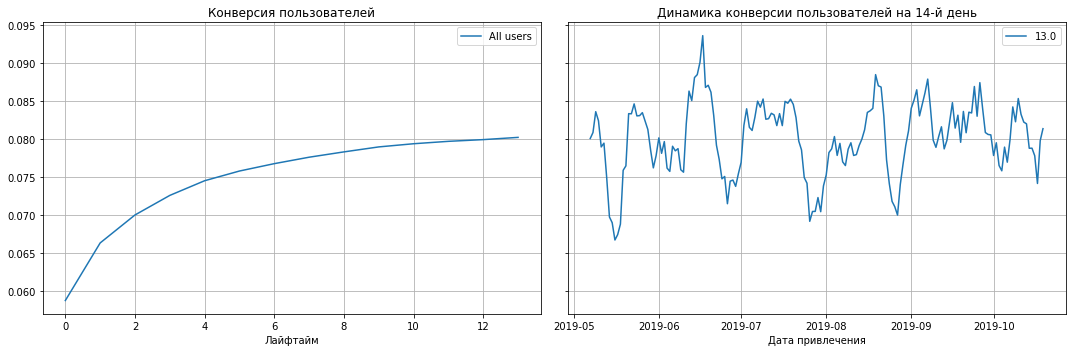

In [148]:
# смотрим общую конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14
)

plot_conversion(conversion_grouped, conversion_history, 14) 

**Вывод: усредненная по всем параметрам (устройство, канал, страна) конверсия пользователей к 14 дню достигает 0,08. Динамика конверсии пользователей нестабильна, на графике с июня по август замечаем сильные провалы в конце месяца.** 

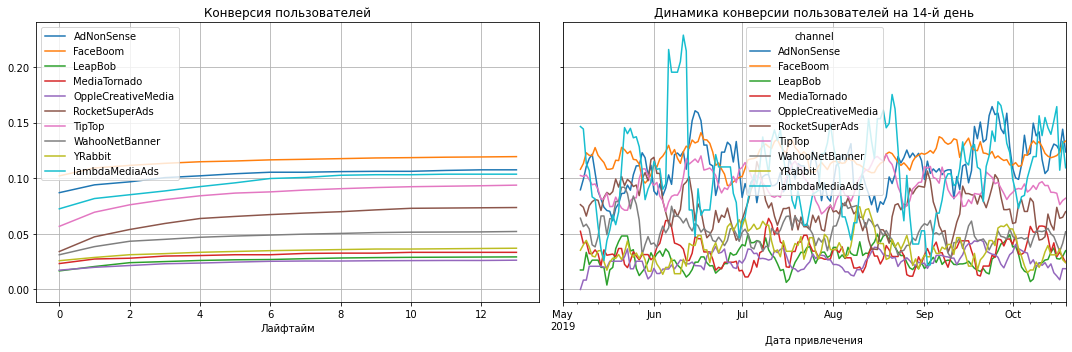

In [149]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14) 

**Вывод: Анализируя график конверсии и динамики конверсии с разбивкой по каналам, можно сделать вывод, что лучше и стабильнее всего конвертируются пользователи каналов FaceBoom, TipTop. Высокий уровень конверсии также у каналов AdNonSense и lambdaMediaAds, но в динамике у этих двух каналов наблюдаются очень сильные скачки, что говорит о нестабильности конверсии.** 

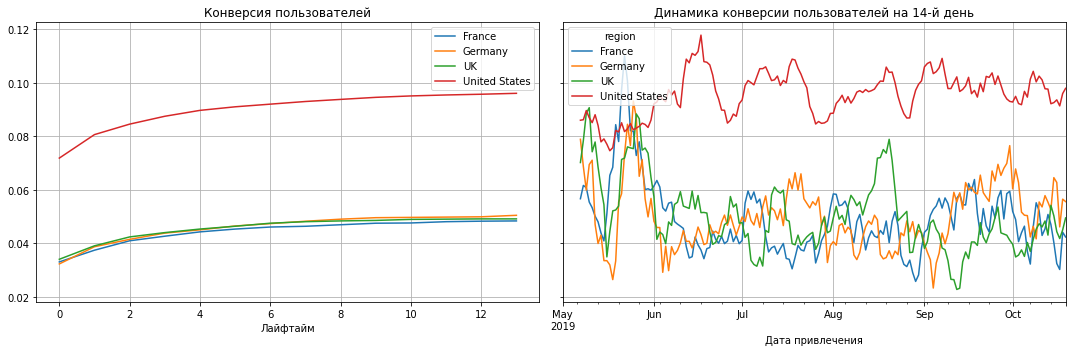

In [150]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, 14)

**Вывод: Анализируя график конверсии и динамики конверсии с разбивкой по странам, можно сделать вывод, что лучше всего конвертируются пользователи из США. Пользователи из Франции, Германии и Соединенного Королевства конвертируются в 2 раза хуже.**

<div class="alert alert-success">
 Как мы уже видели по табличке с долей платящих с конвертацией у нас по США все в порядке)</div>

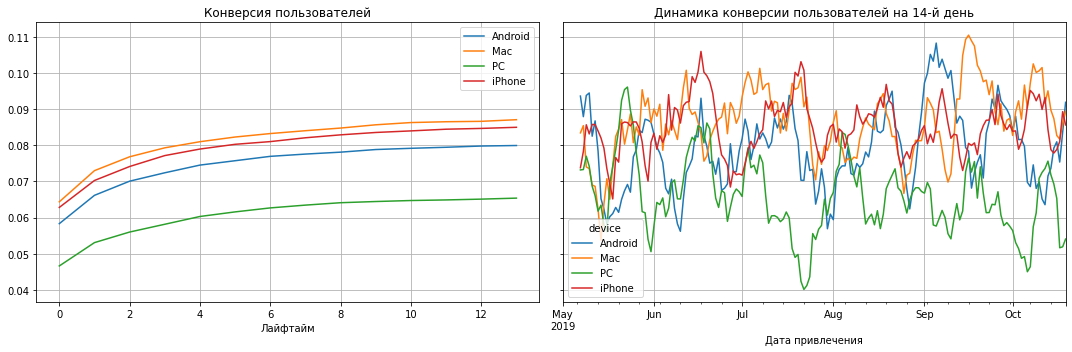

In [151]:
# смотрим конверсию с разбивкой по устройству

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, 14)

**Вывод: Анализируя график конверсии и динамики конверсии с разбивкой по устройствам, можно сделать вывод, что лучше конвертируются пользователи, заходящие в приложение через Мак, Айфон и Адроид, чем пользователи ПК. США лидирует по уровню конверсии пользователей, а Мак и Айфон характерные девайсы для этой страны.**

США лидирует по уровню конверсии пользователей, а Мак и Айфон характерные девайсы для этой страны.

<div class="alert alert-info"> Ниже добавила сводную таблицу с разбивкой по странам и устройствам, отфильтровала по убыванию доли устройств.  </div>

In [152]:
#всего устройств в датасете:
total_devices = profiles['device'].count()
total_devices

150008

In [153]:
#составим сводную таблицу по странам и устройствам
profiles_agg =profiles.groupby(['region', 'device']).agg({'device': 'count'})

#добавим столбец с подсчетом доли устройст и отфильтруем по убыванию доли:
profiles_agg['device_part']=profiles_agg/total_devices
profiles_agg.sort_values(by='device_part', ascending=False)

device  device_part
region        device                      
United States iPhone    44529     0.296844
              Mac       24842     0.165605
              Android   20199     0.134653
              PC        10432     0.069543
UK            PC         7138     0.047584
France        PC         6940     0.046264
Germany       PC         5945     0.039631
France        Android    5252     0.035011
UK            Android    5141     0.034272
Germany       Android    4440     0.029598
UK            iPhone     3518     0.023452
France        iPhone     3420     0.022799
Germany       iPhone     3012     0.020079
France        Mac        1838     0.012253
UK            Mac        1778     0.011853
Germany       Mac        1584     0.010559

<div class="alert alert-info">  Видим, что 30% всех айфонов и 16.5% Маков в датасете принадлежат США. То, что требовалось доказать =)))))  </div>

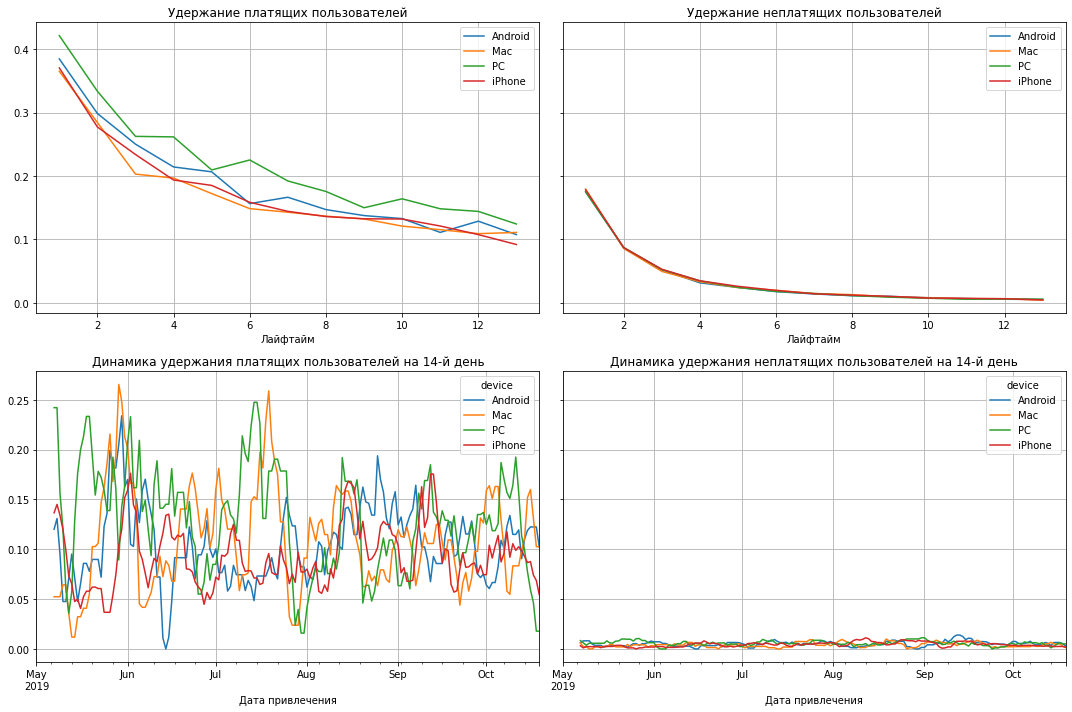

In [154]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ads, visits, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14)

**Вывод: в целом платящие пользователи всех стран удерживаются лучше, чем неплатящие, что соотвествует ожиданиям. Пользователи ПК удерживаются чуть лучше, чем пользователи других устройств.** 

<div class="alert alert-success">
По удержанию в устройствах правда нет существенных выбросов, но PC удерживается чуть получше</div>

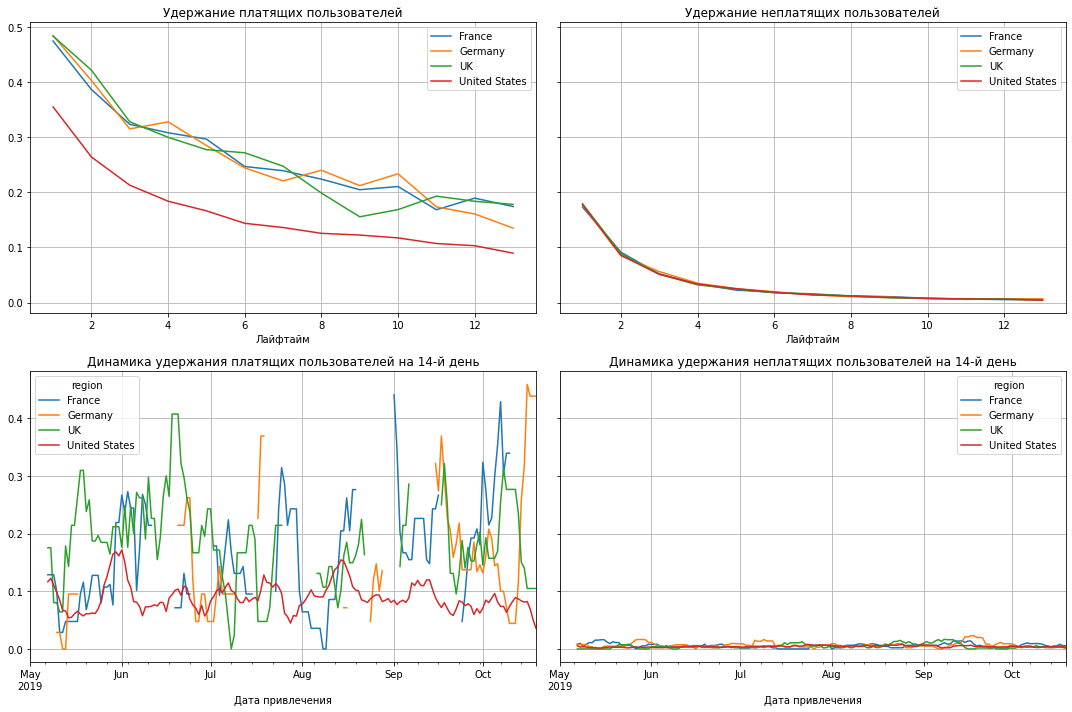

In [155]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ads, visits, datetime(2019, 11, 1).date(), 14, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14)

**Вывод: хуже всего удерживаются платящие пользователи из США. Возможно, у пользователей возникают проблемы с оплатой**

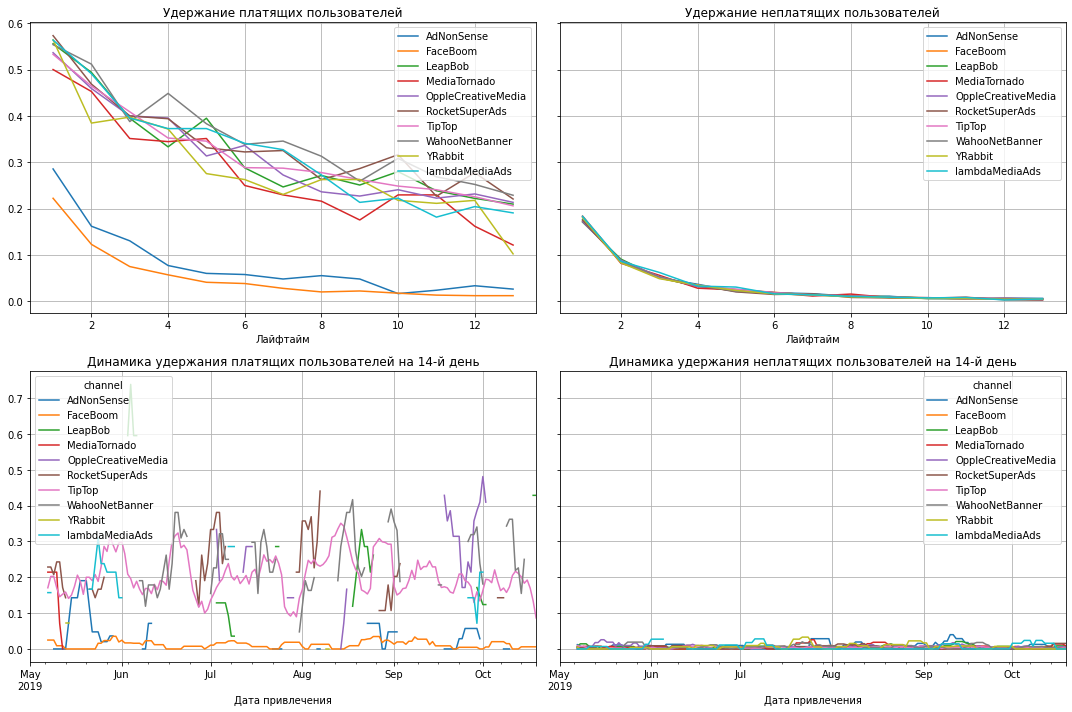

In [156]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ads, visits, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14)

**Вывод: Хуже всего удерживаются платящие пользователи FaceBoom и AdNonSense.**

#### Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

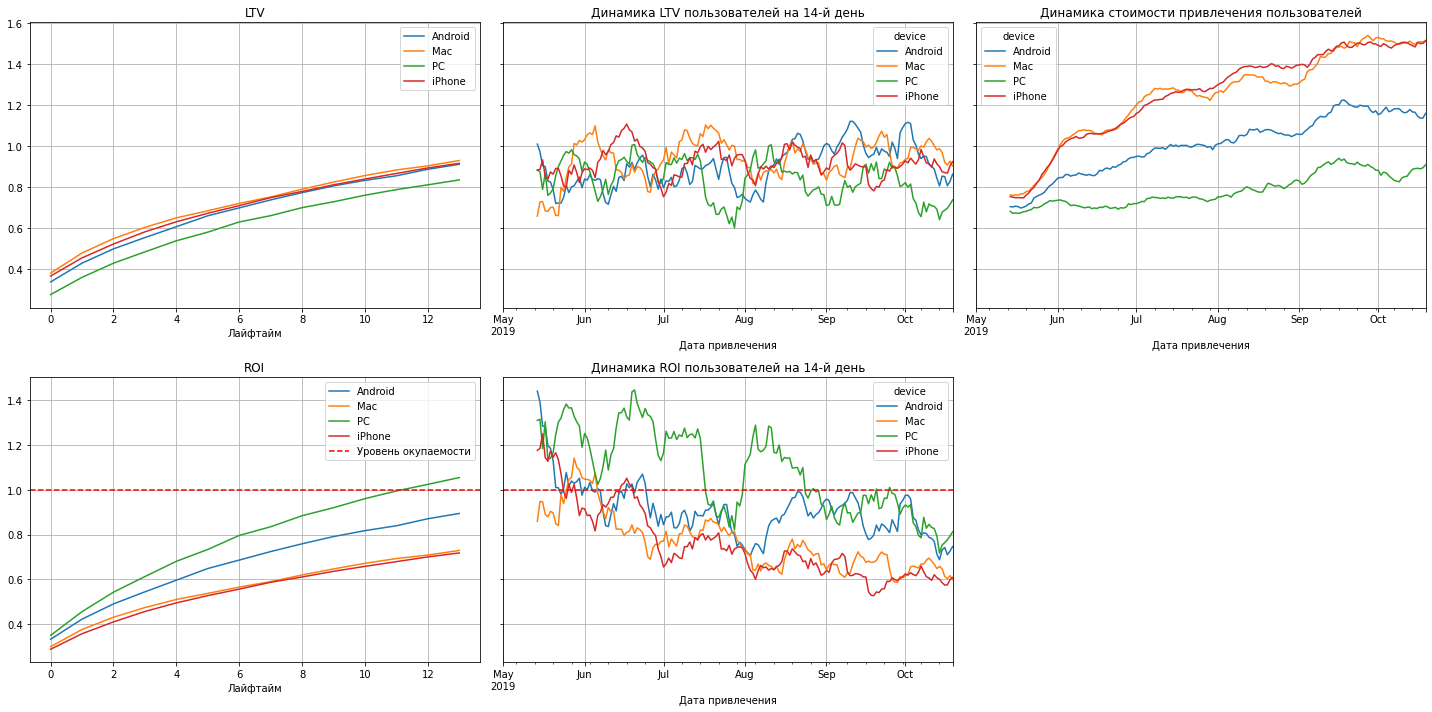

In [157]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

**Вывод: LTV пользователей монотонно растет для всех устройств, динамика LTV также достаточно стабильна без резких скачков. Согласно графику ROI реклама окупается на 12 день только для пользователей ПК, при этом динамика ROI для ПК имеет скачки и падения. Для остальных устройств реклама не окупается (ROI < 1) при этом динамика стабильно нисходящая.На графике динамики привлечения пользователей видим значительный рост расходов на привлечение 1 пользователя для всех устройств, а для Мак и Айфон в особенности.** 

<div class="alert alert-success">
САС у Apple очень дорогой, но при этом окупаемости оба устройства так и не достигли. Окупается в итоге только ПК.</div>

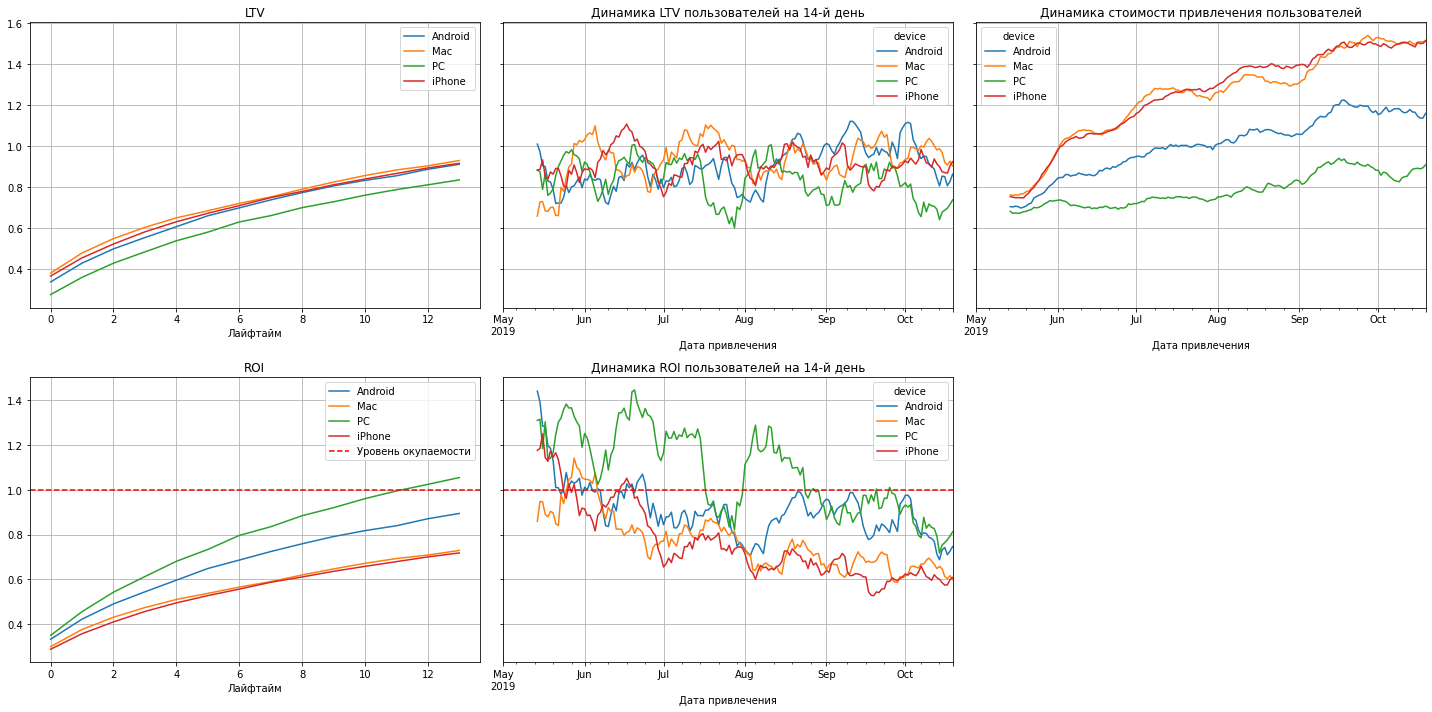

In [158]:
# смотрим окупаемость с разбивкой по устройствам и исключаем неокупаемые каналы:
profiles_ads_filtered = profiles_ads.query('channel!="TipTop" & channel!="FaceBoom" & channel!="AdNonSence"')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

#### Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

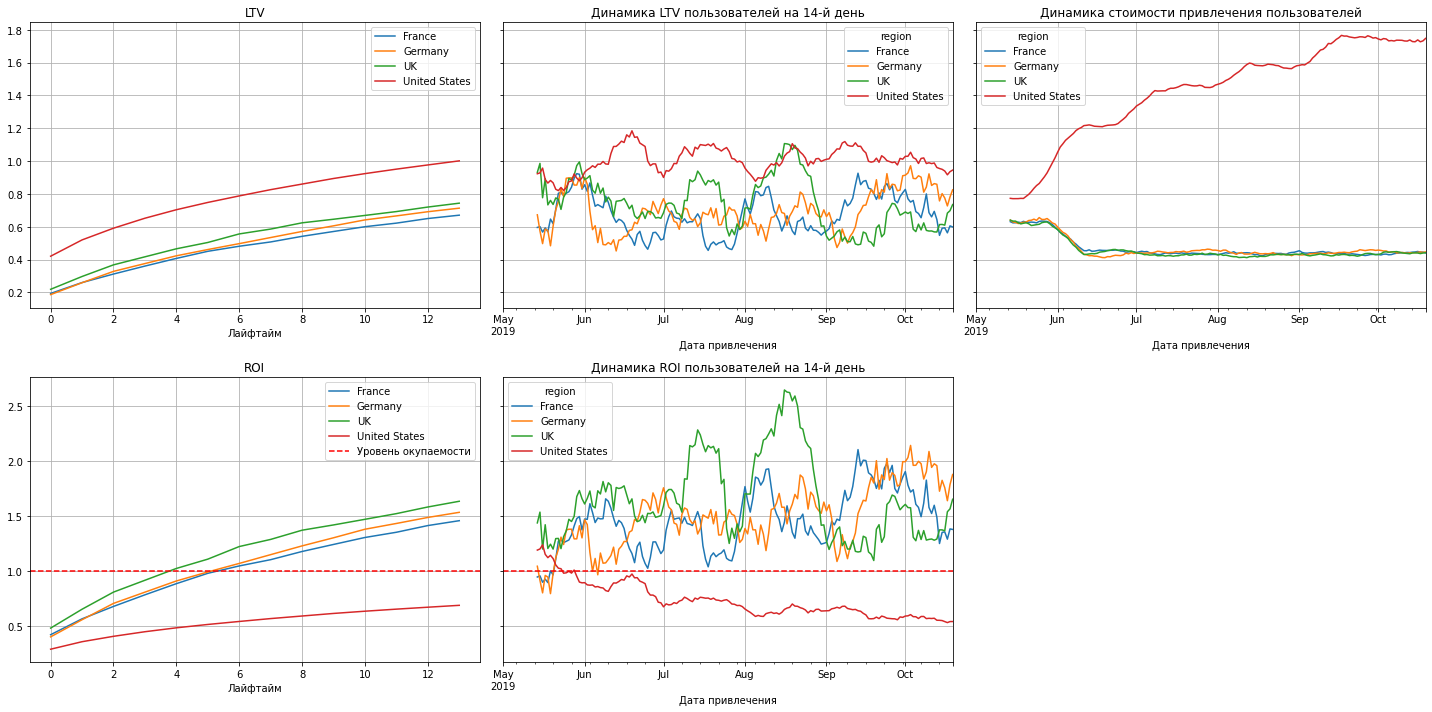

In [159]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

**Вывод: Пожизненная ценность клиента (LTV) монотонно растет для всех стран, при этом лучше всего для США. Динамика LTV для США без резких скачков. Согласно графику ROI лучше окупаются пользователи из Европы (Германия, Франция, Соединенное королевоство). Пользователи из США не окупаются, на графике динамики CaC видим скачок увеличения стоимости привлечения одного пользователя из США. На графике динамики ROI также для США наблюдаем стабильное падение окупаемости. Расходы на привлечение растут, а окупаемости нет.**

#### Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

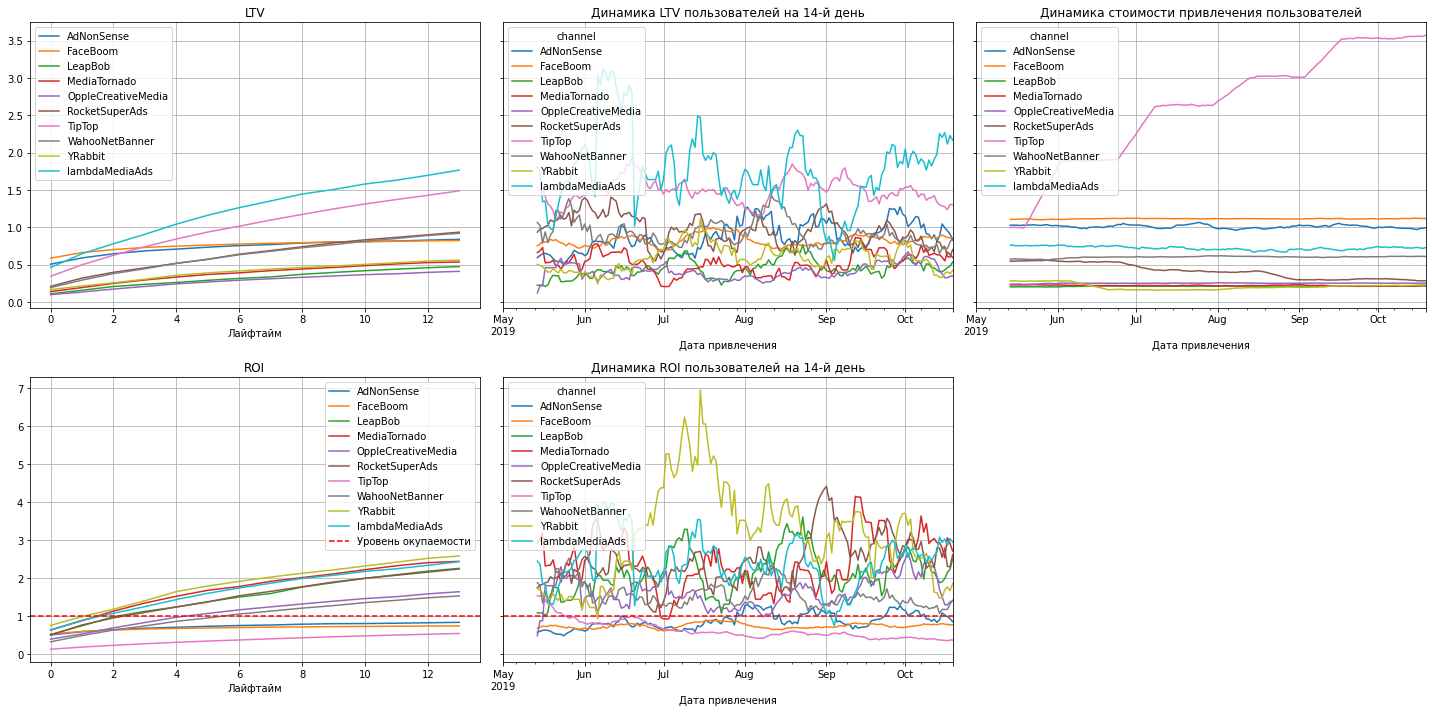

In [160]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

<div class="alert alert-info"> Исключила неокупаемые каналы (AdNonSense, TipTop и FaceBoom), ниже графики с разбивкой по устройствам. Теперь мы можем видеть, что окупамость близка для всех устройств в окупаемых каналах. Значит, проблем конкретно с устройствами нет, а есть проблемы с каналами AdNonSense, TipTop и FaceBoom. </div>

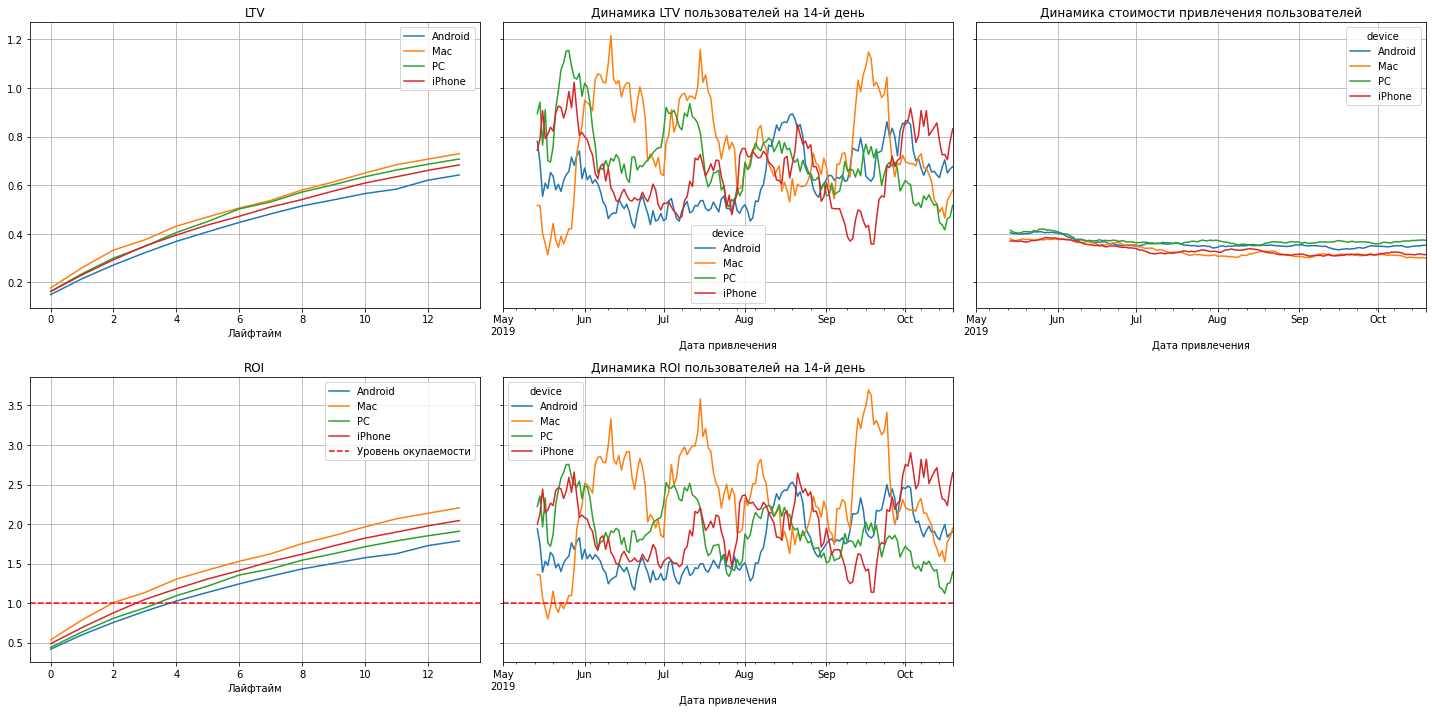

In [161]:
# V 2.0: смотрим окупаемость с разбивкой по устройствам, исключая неокупаемые каналы
profiles_ads_filtered = profiles_ads.query('channel!="FaceBoom" & channel!="TipTop" & channel!="AdNonSense"')

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads_filtered, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

<div class="alert alert-info"> Исключила неокупаемые каналы (AdNonSense, TipTop и FaceBoom), ниже графики с разбивкой по странам. Теперь мы можем видеть, что окупамость близка для всех стран в окупаемых каналах. Значит, проблем конкретно со странами нет, а есть проблемы с каналами AdNonSense, TipTop и FaceBoom. </div>

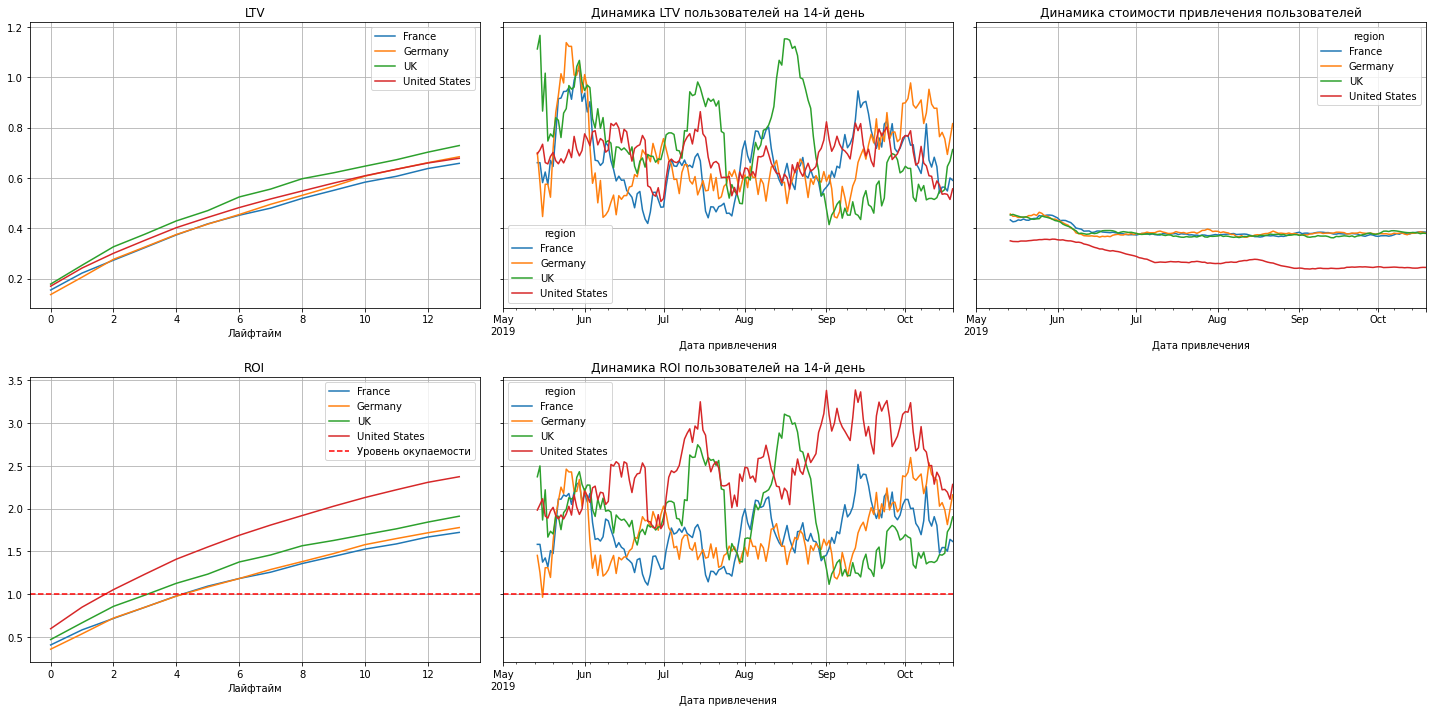

In [162]:
# V 2.0: смотрим окупаемость с разбивкой по устройствам, исключая неокупаемые каналы
profiles_ads_filtered = profiles_ads.query('channel!="FaceBoom" & channel!="TipTop" & channel!="AdNonSense"')

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ads_filtered, orders, datetime(2019, 11, 1).date(), 14, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14
) 

**Вывод: Пожизненная ценность клиента  LTV выше для каналов lambdaMediaAds, TipTop, при этом в динамике LTV мы видим, что для lambdaMediaAds характерны сильные колебания.  Согласно графику ROI не окупается реклама из 3 каналов: AdNonSense, TipTop и FaceBoom. Реклама из остальных каналов окупается. В динамике ROI заметен сильный скачок в июле-августе для канала YRabbit. В динамике CaC заметно сильное увеличение бюджета на привлечение 1 пользователя для канала TipTop. Кажется, эти ребята не жалеют денег!**

**ВЫВОДЫ Исследовательский анализ данных**

**Определите минимальную и максимальную даты привлечения пользователей.**
- Интервал привлечения пользователей в приложение с 1 мая по 27 октября 2019 года

**Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.** 
- Пользователи в приложение приходят из США, Соедененного Королевства, Германии и Франции. Больше всего пользователей приложения из США, суммарно количество пользователей Европы (Соедененного Королевства, Германии и Франции) составляют примерно половину от пользователей США.** 

- Что касается платящих пользователей, то в среднем по датасету их 6%. Если делать разбивку по странам, то платящих пользователей также больше из США: 7% против примерно 4% из Европейских стран (Соедененного Королевства, Германии и Франции).

**Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.**
- Самый большой процент клиентов заходят в приложение через Айфон, далее примерно в равных долях идут ПК, андроид и Мак. Платящие пользователи чаще всего также используют Мак и Айфон (доля примерно 6%), далее следуют андроид (доля 5.8%) и ПК (5%). Здесь стоит отметить, что доли платящих пользователей по устройствам различаются не сильно: всего на 1%.

**Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.**
- Вывод: Тройка лидеров каналов привлечения всех пользователей: 1- Organic, 2 - FaceBoom, 3-TipTop. Тройка лидеров платящих пользователей 1-FaceBoom (доля платящих - 12%), 2-TipTop (доля платящих - 10%), 3-Organic (доля платящих - 2%).

**ВЫВОДЫ: Маркетинг**

**Посчитайте общую сумму расходов на маркетинг.**
- Общая сумма расходов на рекламные кампании: 105 497 денежных единиц (в аннотации к датасету не указана валюта)

**Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.**
-  По сумме трат в каналах лидирует TipTop: ему принадлежат 52% всего бюджета. Доля платящих пользователей TipTop - 10% - на 4 месте в рейтинге всех каналов. Что касается FaceBoom, то по тратам канал на 2 месте после TipTop: ему принадлежат 31% от всего бюджета, доля платящих пользователей 12%, что относит канал на 1 место в рейтинге.

**Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.**

- Расходы растут с мая по октябрь по каналам TipTop (со 100  до 450 денежных ед.) и FaceBoom (со 100 до 200 денежных ед). Что касается других каналов, по ним расходы в динамике не изменяются.
- На графике с выделением недель можно отметить явную закономерность увеличения рекламного бюджета наших самых дорогих каналов TipTop и FaceBoom на 3 неделе каждого месяца с характерным падением к 1 неделе следующего месяца.

**Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.**

- Самая высокая стоимость привлечения 1 клиента (CAC) в канале TipTop = 2.8 (в 2.5 раза превышает средний СаС по платным каналам), в FaceBoom = 1.1 (на уровне среднего СаС по платным каналам). Далее по убыванию от 1.0 до 0 следуют другие рекламные каналы. Средний СаС по платным каналам = 1.13.

**ВЫВОДЫ: Окупаемость рекламы**

**Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.**
- Реклама не окупается. ROI к 14ому дню выходит на уровень 80%.
CAC заметно растет с мая по октябрь, что говорит об увеличении рекламного бюджета.
LTV в динамике на 14 день стабильно колеблется от 0.8 до 1, что соотвествует усредненному LTV 0.9 на графике слева. 
ROI в динамике на 14 день держится на уровне окупаемости с мая по середин июня, а с июля по октябрь монотонно снижается, падая за уровень окупаемости.  То есть с мая по середину июня реклама окупалась, а далее начались проблемы..

**Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.**
- Усредненная по всем параметрам (устройство, канал, страна) конверсия пользователей к 14 дню достигает 0,08. Динамика конверсии пользователей нестабильна, на графике с июня по август замечаем сильные провалы в конце месяца.
- Анализируя график конверсии и динамики конверсии с разбивкой по каналам, можно сделать вывод, что лучше и стабильнее всего конвертируются пользователи каналов FaceBoom, TipTop. Высокий уровень конверсии также у каналов AdNonSense и lambdaMediaAds, но в динамике у этих двух каналов наблюдаются очень сильные скачки, что говорит о нестабильности конверсии.
- Анализируя график конверсии и динамики конверсии с разбивкой по странам, можно сделать вывод, что лучше всего конвертируются пользователи из США. Пользователи из Франции, Германии и Соединенного Королевства конвертируются в 2 раза хуже.
- Анализируя график конверсии и динамики конверсии с разбивкой по устройствам, можно сделать вывод, что лучше конвертируются пользователи, заходящие в приложение через Мак, Айфон и Адроид, чем пользователи ПК. США лидирует по уровню конверсии пользователей, а Мак и Айфон характерные девайсы для этой страны.

- Что касается удержания, то в целом платящие пользователи всех стран удерживаются лучше, чем неплатящие, что соотвествует ожиданиям. Пользователи ПК удерживаются чуть лучше, чем пользователи других устройств.
- Хуже всего удерживаются платящие пользователи из США. Возможно, у пользователей возникают проблемы с оплатой.
- Хуже всего удерживаются платящие пользователи FaceBoom и AdNonSense.

**Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**
-  LTV пользователей монотонно растет для всех устройств, динамика LTV также достаточно стабильна без резких скачков. Согласно графику ROI реклама окупается на 12 день только для пользователей ПК, при этом динамика ROI для ПК имеет скачки и падения. Для остальных устройств реклама не окупается (ROI < 1) при этом динамика стабильно нисходящая. На графике динамики привлечения пользователей видим значительный рост расходов на привлечение 1 пользователя для всех устройств, а для Мак и Айфон в особенности. 

**Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**
-  Пожизненная ценность клиента (LTV) монотонно растет для всех стран, при этом лучше всего для США. Динамика LTV для США без резких скачков. Согласно графику ROI лучше окупаются пользователи из Европы (Германия, Франция, Соединенное королевоство). Пользователи из США не окупаются, на графике динамики CaC видим скачок увеличения стоимости привлечения одного пользователя из США. На графике динамики ROI также для США наблюдаем стабильное падение окупаемости. Расходы на привлечение растут, а окупаемости нет.

**Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**
- Пожизненная ценность клиента  LTV выше для каналов lambdaMediaAds, TipTop, при этом в динамике LTV мы видим, что для lambdaMediaAds характерны сильные колебания.  Согласно графику ROI не окупается реклама из 3 каналов: AdNonSense, TipTop и FaceBoom. Реклама из остальных каналов окупается. В динамике ROI заметен сильный скачок в июле-августе для канала YRabbit. В динамике CaC заметно сильное увеличение бюджета на привлечение 1 пользователя для канала TipTop. Кажется, эти ребята не жалеют денег!

#### Ответьте на вопросы

**Окупается ли реклама, направленная на привлечение пользователей в целом?**
- Реклама не окупается. ROI к 14ому дню выходит на уровень 80%. CAC заметно растет с мая по октябрь, что говорит об увеличении рекламного бюджета. ROI в динамике держится на уровне окупаемости с мая по середину июня, а с июля по октябрь монотонно снижается, падая ниже уровня окупаемости. То есть с мая по середину июня реклама окупалась, а далее начались проблемы.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**
- Реклама окупается для всех устройств, если исключить неокупаемые каналы (AdNonSense, TipTop и FaceBoom). На графике динамики привлечения пользователей видим значительный рост расходов на привлечение 1 пользователя для всех устройств, а для Мак и Айфон в особенности. То есть рекламный бюджет увеличивается, а пользователи не окупаются.

- Реклама окупается для всех стран, если исключить неокупаемые каналы (AdNonSense, TipTop и FaceBoom). На графике динамики CaC видим скачок увеличения стоимости привлечения одного пользователя из США. Расходы на привлечение пользователей из США растут, а окупаемости нет (из-за неокупаемых каналов).

- Пробемы с окупаемостью реклама есть у 3 каналов: AdNonSense, TipTop и FaceBoom. В динамике CaC заметно сильное увеличение бюджета на привлечение 1 пользователя для канала TipTop. Кажется, эти ребята не жалеют денег!

**Чем могут быть вызваны проблемы окупаемости?**
- Проблемы вызваны тремя рекламными каналами: AdNonSense, TipTop и FaceBoom, возможно,  качеством самого рекламного контента. Видим увеличение рекламного бюджета, и при этом падение окупаемости при хорошей конверсии пользователей.

#### Причины неэффективности привлечения пользователей

Показатель СаС сильно растет для:
- пользователей в США
- канала TipTop
- устройств Мак и Айфон (устройства, наиболее популярные в США)

В связи с этим следует обратить внимание на рекламный контент в канале TipTop, который транслируется в США через устройства Мак и Айфон.

#### Рекомендации для отдела маркетинга

1. Хуже всего окупается реклама в США. Это объясняется плохой окупаемостью проблемных каналов (AdNonSense, TipTop и FaceBoom). Пользователей приложения в США в 2 раза больше, чем пользователей остальных стран вместе взятых. При этом доля платящих пользователей из США лидирует среди других стран и составляет 7%, также Мак и Айфон являются самыми популярными устройствами для платящих пользователей(доля 6%). Пользователи из США конвертируются лучше, чем из других стран, но при этом удерживаются хуже всех остальных пользователей.  

2. Несмотря на увеличение рекламного бюджета, не окупается реклама из 3 каналов: AdNonSense, TipTop и FaceBoom, при этом пользователи этих каналов хорошо конвертируются, но плохо удерживаются. Следует обратить внимание на качество рекламного контента для этих каналов.

3. Для канала TipTop наблюдаем увеличение СaC, то есть рекламный бюджет увеличивается, но при этом окупаемости нет. Возможно, в данном канале неудачный рекламный контент. Следует обратить особое внимание на рекламу, которая транслируется в данном канале.